## Clustering of Time Series to find OTUs with similar "behaviour" / evolution

Another idea to reduce our 200 by 200  interactions and not just selecting only 25 species to look at, we might be able to cluster time-series that are evolving in a very similar manner, like the 'Robust scalable models' does.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
import scipy.cluster.hierarchy as hac
from utils import load_data
from scipy.cluster.hierarchy import fcluster

In [0]:
# load mice data
mice = load_data()

# start with mouse2
mouse2 = mice[2]

# percent reads / times
mouse2_quant = mouse2['reads_abs_mean']
mouse2_pct = mouse2['reads_percent']
mouse2_t = mouse2['times']
mouse2_otu = mouse2['otus']

### Looking for clusters in quantitative time-series of the first 30 OTUs of mouse 2

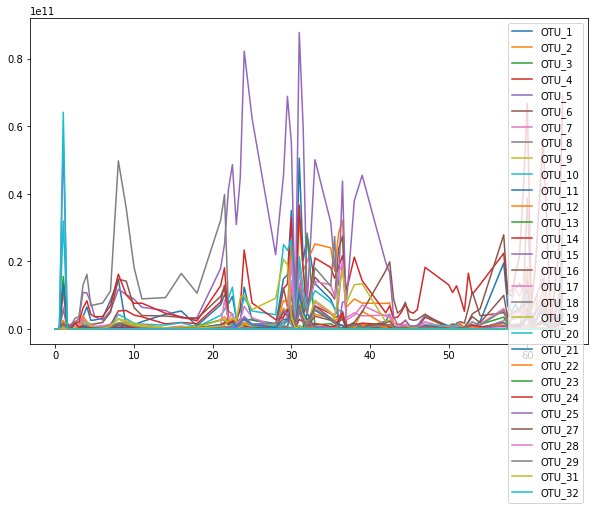

In [3]:
plt.figure(figsize=(10,6))
for i in range(30):
  plt.plot(mouse2_t, mouse2_quant[i, :], label=str(mouse2_otu[i]))
plt.legend();

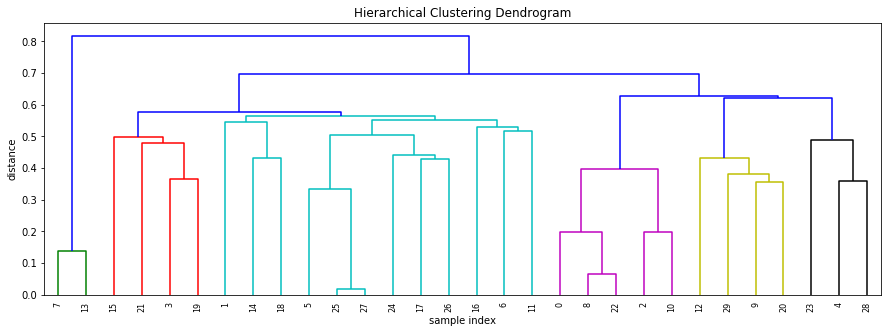

In [4]:
# Do the clustering
timeSeries = pd.DataFrame(mouse2_pct[:30, :])
Z = hac.linkage(timeSeries, method='single', metric='correlation')

# Plot dendogram
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [0]:
perturbation = list(np.arange(21.5, 29.0,0.5))+list(np.arange(35.5, 43.0,0.5))+list(np.arange(50.5, 58.0,0.5))
perturbation_times_healthy = { ind:time for ind,time in enumerate(mouse2_t) if time in set(perturbation) }
List_indices_perturbations_healthy = np.array(list(perturbation_times_healthy.keys()))

In [0]:
def print_clusters(timeSeries, Z, k, plot=False):
    # k Number of clusters I'd like to extract
    results = fcluster(Z, k, criterion='maxclust')

    # check the results
    s = pd.Series(results)
    clusters = s.unique()

    for c in clusters:
        cluster_indeces = s[s==c].index
        print("Cluster %d number of entries %d" % (c, len(cluster_indeces)))
        if plot:
            plt.axvspan(21, 29, alpha=0.2, color='r', label='High Fat Diet', )
            plt.axvspan(38, 46, alpha=0.2, color='g', label='Gram+ ABX', )
            plt.axvspan(55, 64, alpha=0.2, color='b', label='Gram- ABX', )
            for ind in cluster_indeces: 
              plt.plot(timeSeries.iloc[ind,:], label=str(ind+1))
            plt.legend(loc='upper left')
            plt.show()

Cluster 6 number of entries 5
Cluster 3 number of entries 3
Cluster 2 number of entries 4
Cluster 8 number of entries 3
Cluster 4 number of entries 6
Cluster 5 number of entries 3
Cluster 1 number of entries 2
Cluster 7 number of entries 4


Plotting our clusters
Cluster 6 number of entries 5


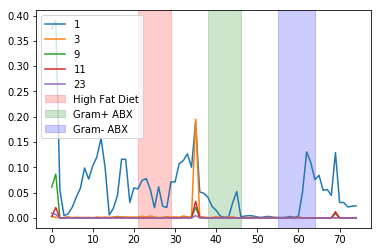

Cluster 3 number of entries 3


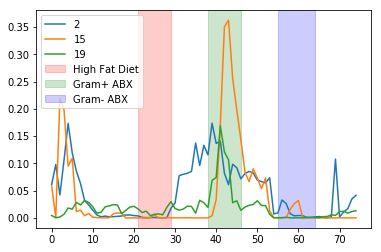

Cluster 2 number of entries 4


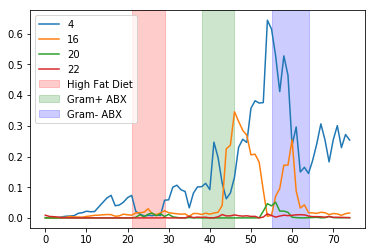

Cluster 8 number of entries 3


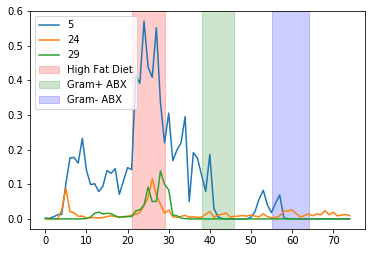

Cluster 4 number of entries 6


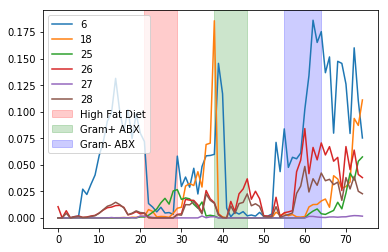

Cluster 5 number of entries 3


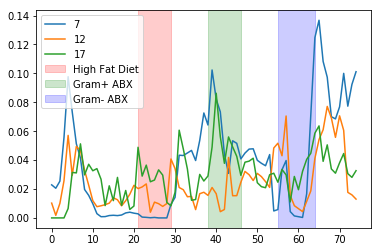

Cluster 1 number of entries 2


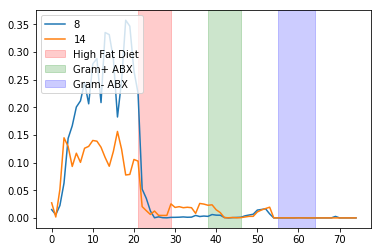

Cluster 7 number of entries 4


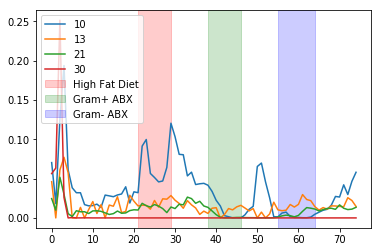

In [7]:
print_clusters(timeSeries, Z, 8, plot=False)

print('\n\nPlotting our clusters')
print_clusters(timeSeries, Z, 8, plot=True)

### Looking for clusters in relative reads time-series of the first 30 OTUs of mouse 2

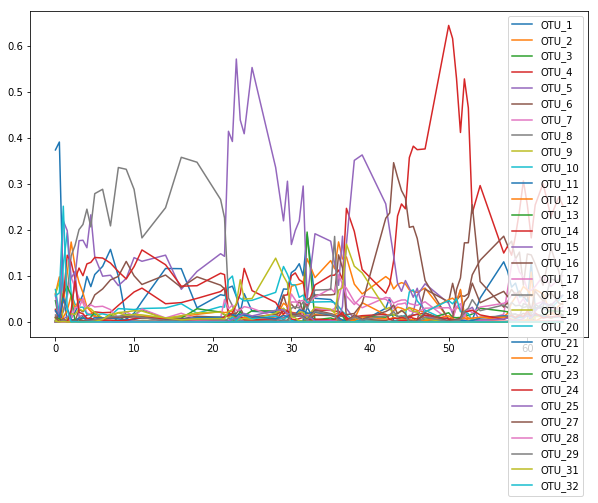

In [8]:
plt.figure(figsize=(10,6))
for i in range(30):
  plt.plot(mouse2_t, mouse2_pct[i, :], label=str(mouse2_otu[i]))
plt.legend();

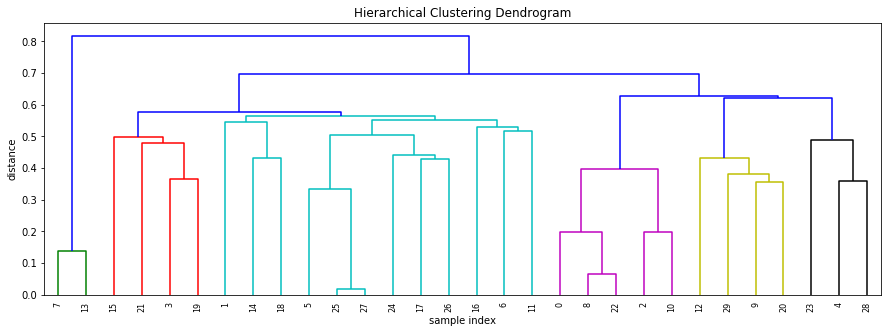

In [9]:
# Do the clustering
timeSeries = pd.DataFrame(mouse2_pct[:30, :])
Z = hac.linkage(timeSeries, method='single', metric='correlation')

# Plot dendogram
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

Cluster 6 number of entries 5
Cluster 3 number of entries 3
Cluster 2 number of entries 4
Cluster 8 number of entries 3
Cluster 4 number of entries 6
Cluster 5 number of entries 3
Cluster 1 number of entries 2
Cluster 7 number of entries 4


Plotting our clusters
Cluster 6 number of entries 5


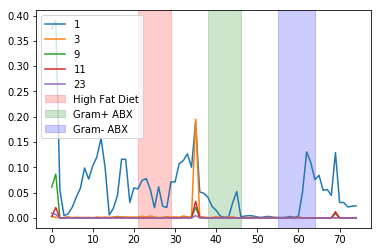

Cluster 3 number of entries 3


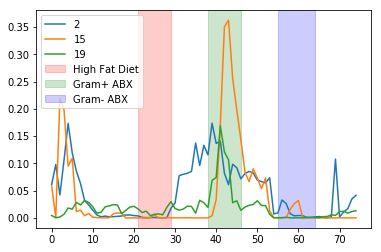

Cluster 2 number of entries 4


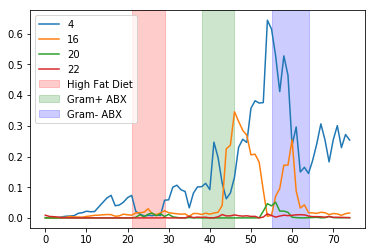

Cluster 8 number of entries 3


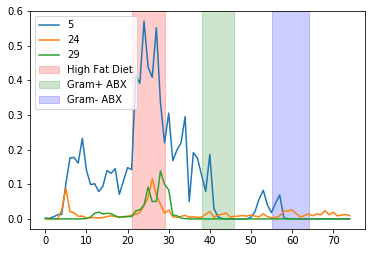

Cluster 4 number of entries 6


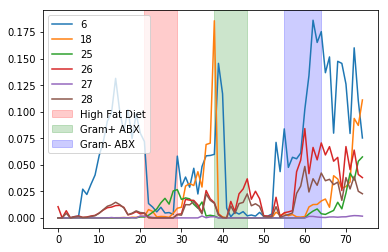

Cluster 5 number of entries 3


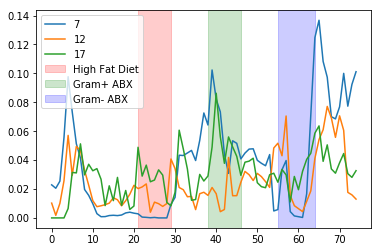

Cluster 1 number of entries 2


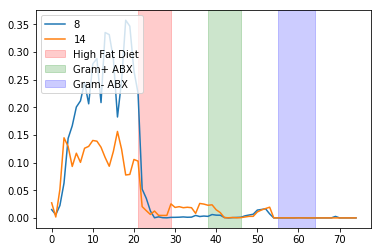

Cluster 7 number of entries 4


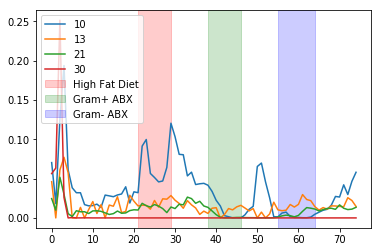

In [10]:
print_clusters(timeSeries, Z, 8, plot=False)

print('\n\nPlotting our clusters')
print_clusters(timeSeries, Z, 8, plot=True)

The relative reads clusters already look better, and it seems some of the clusters are related to the perturbations:
 - Cluster 3 grows well during Gram+ Antibiotics
 - Cluster 2 dies during Gram- Antibiotics
 - Cluster 4 grows during Gram- Antibiotics
 - Cluster 8 grows during high fat diet

Yet still for example two OTU's can react to changing environments in very similar manners, for example doubling it's relative abandance at the same times, and still if there relative reads value would be very different they won't appear in the same cluster. That's why we normalize the relative reads in the next section (so the exact abandance of two OTU's can be very different still after normalising if they act in the same manner to the environment they will have the same evolution and will be clustered together).

### Looking for clusters in relative reads evolution time-series of the first 30 OTUs of mouse 2

The difference now is that we put all the OTU's to have the same mean of 1. 
This potentially allows two OTU's with the exact same shape but with different percentages (for example the first is on average 10% over time and the second one is only account for 1% of the reads on average)

In [0]:
number_of_time_series=30
mouse2_pct_norm=mouse2_pct[:number_of_time_series, :].copy()

thing_to_norm=mouse2_pct
for i in range(0,number_of_time_series):
  mouse2_pct_norm[i,:]=thing_to_norm[i, :]/np.mean(thing_to_norm[i, :])

In [12]:
display(mouse2_pct_norm.shape)
display(np.mean(mouse2_pct_norm, axis=1).shape)
display(np.mean(mouse2_pct_norm, axis=1))

(30, 75)

(30,)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

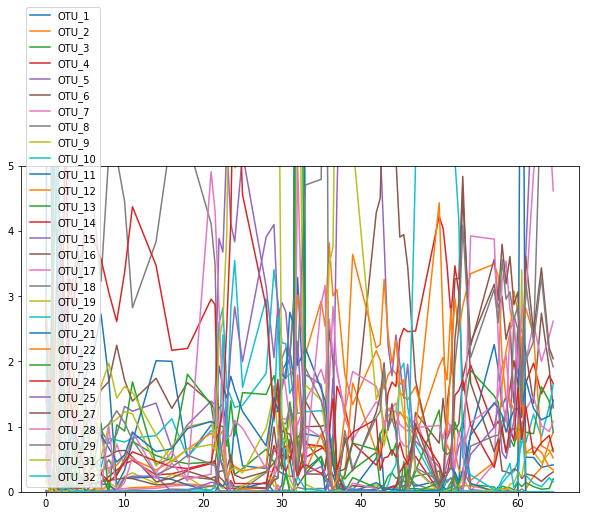

In [13]:
# visualize
plt.figure(figsize=(10,6))
for i in range(number_of_time_series):
  plt.plot(mouse2_t, mouse2_pct_norm[i, :], label=str(mouse2_otu[i]))

plt.ylim(0,5)
plt.legend();

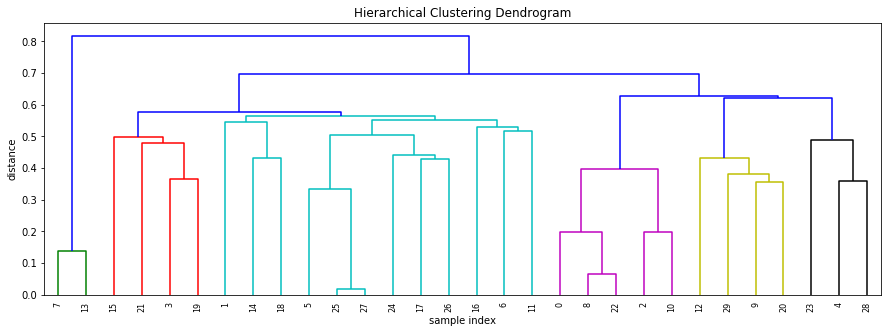

In [14]:
# Do the clustering
timeSeries = pd.DataFrame(mouse2_pct_norm[:number_of_time_series, :])
Z = hac.linkage(timeSeries, method='single', metric='correlation')

# Plot dendogram
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

Cluster 6 number of entries 5
Cluster 3 number of entries 3
Cluster 2 number of entries 4
Cluster 8 number of entries 3
Cluster 4 number of entries 6
Cluster 5 number of entries 3
Cluster 1 number of entries 2
Cluster 7 number of entries 4


Plotting our clusters
Cluster 6 number of entries 5


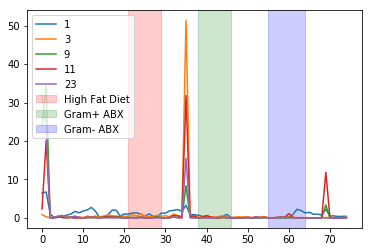

Cluster 3 number of entries 3


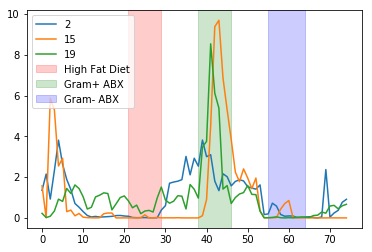

Cluster 2 number of entries 4


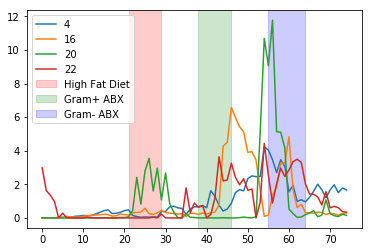

Cluster 8 number of entries 3


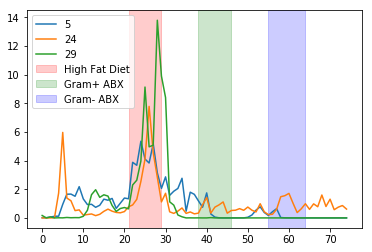

Cluster 4 number of entries 6


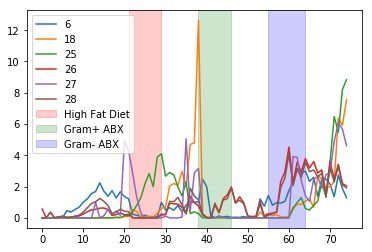

Cluster 5 number of entries 3


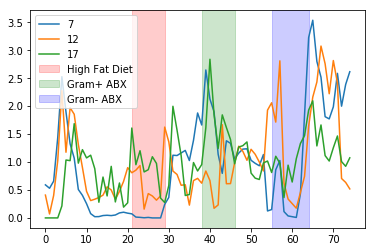

Cluster 1 number of entries 2


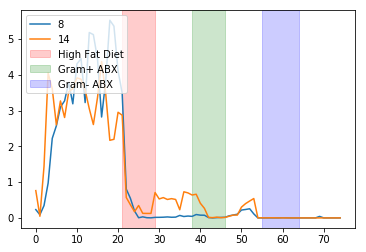

Cluster 7 number of entries 4


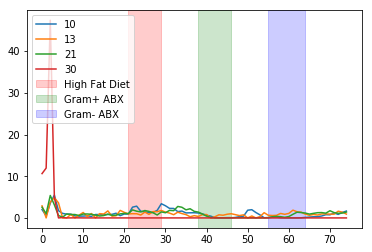

In [15]:
print_clusters(timeSeries, Z, 8, plot=False)

print('\n\nPlotting our clusters')
print_clusters(timeSeries, Z, 8, plot=True)

Visually better clusters, with a good match of evolution over time comparing within OTUs and again related to some of the perturbation like cluster 8 in high fat diet and cluster 3 during gram+ antibiotics... We might use these groups of OTUs as clusters to reduce the possible number of bacterial iteractions by restricting the model by allowing only clusters to interact.

---------

[link to collab](https://colab.research.google.com/drive/1PFY3UK4vvhmB2iVzCTwWY-mZgTcTSkBq)